In [1]:
from datetime import date,datetime,timedelta

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd

In [3]:
np.random.seed(1234)

In [11]:
df = pd.DataFrame(index=pd.to_datetime(
[datetime(2019,1,1)+timedelta(hours=h+10*np.random.uniform()) for h in range(0, 1000)]),
                   data = {
                   'browser': np.random.choice([
                   'chrome',
                   'firefox',
                   'safari',
                   'edge'
            ], size = 1000,  replace = True) 
                   }
                 )

In [12]:
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [13]:
df.index.name= 'login_datetime'


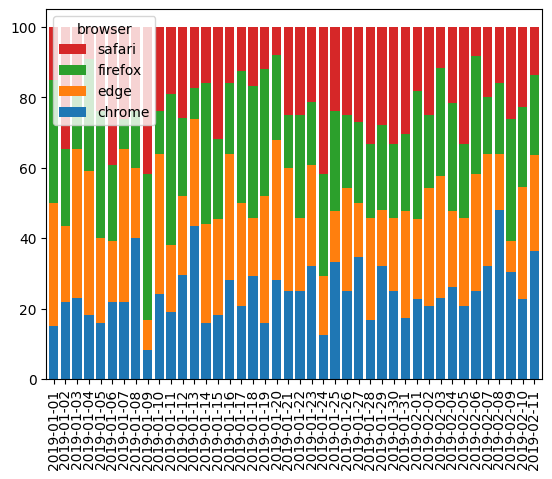

In [14]:
df.groupby(by=[lambda dt: dt.strftime('%Y-%m-%d'),'browser']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True,legend='reverse',width=0.8)

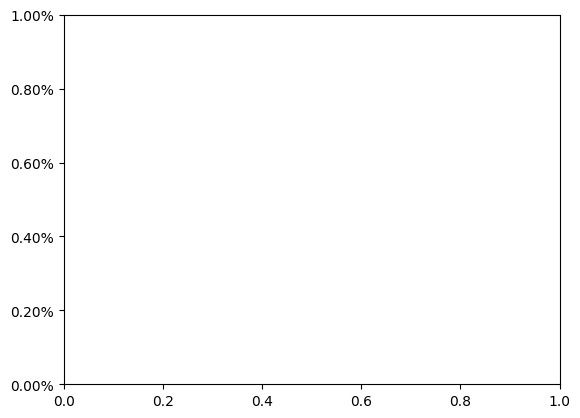

In [15]:
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()